# Multiple Linear regression 
1 - here we deal with boston dataset

In [42]:
from sklearn.datasets import load_boston
import pandas as pd


In [43]:

boston = load_boston()

X = boston.data
y = boston.target

In [44]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [45]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [46]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [47]:
import pandas as pd
df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [49]:

# Normalise this dataset
# Each feature must have 0 mean, unit variance
import numpy as np
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
#print(u.shape,std.shape)

In [50]:
# Normalise the Data
X = (X-u)/std

In [51]:
# Normalised Data
pd.DataFrame(X[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


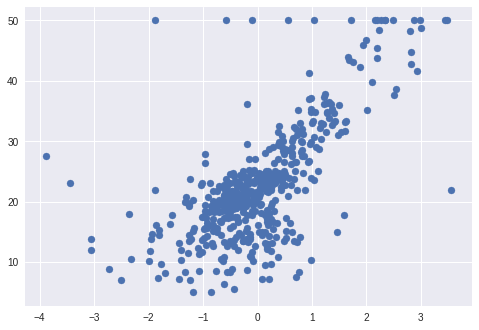

In [52]:

# Plot Y vs any feature
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.scatter(X[:,5],y)
plt.show()

## SECTION 2 LINEAR REGRESSION ON MULTIPLE FEATURES 
BOSTON hOUSING DATASET

In [53]:
X.shape, y.shape

((506, 13), (506,))

In [54]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(506, 14)


In [55]:
print(X[3])

[ 1.         -0.41675042 -0.48772236 -1.30687771 -0.27259857 -0.83528384
  1.01630251 -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321
  0.41616284 -1.36151682]


In [56]:

# X - Matrix ( m x n)
# x - Vector (Single Example with n features)

def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_  += (theta[i]*x[i])
    return y_

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i] - y_)**2
        
    return e/m

def gradient(X,y,theta):
    m,n = X.shape
    
    grad = np.zeros((n,))
    
    # for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    # Out of the loops
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        # Gradient Descent
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
        
    return theta,error_list

In [57]:

import time
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken is ", end-start)

Time taken is  16.747833967208862


### QUITE SLOW 18 SECONDS JUST 506 EXAMPLES IN THE TRAINING DATA


In [58]:

print(theta)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


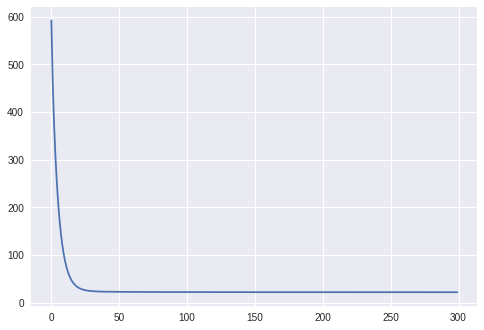

In [59]:
plt.plot(error_list)
plt.show()

#### prediction

In [60]:
y_ = []
m = X.shape[0]

for i in range(m):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)

In [61]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [62]:
# SCORE
r2_score(y,y_)


74.04541323942743

# sedction 3 optimsing code using vectorization
An Efficent Implemenation for Linear Regression using Vectorization

Avoid loops in the implemenation, except gradient descent main loop


Use numpy functions like np.sum(), np.dot() which are quite fast and already optimised

In [98]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y)) 
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [99]:

start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken by Vectorized Code",end-start)


Time taken by Vectorized Code 0.032923221588134766


### really very fast! :D

In [100]:
theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

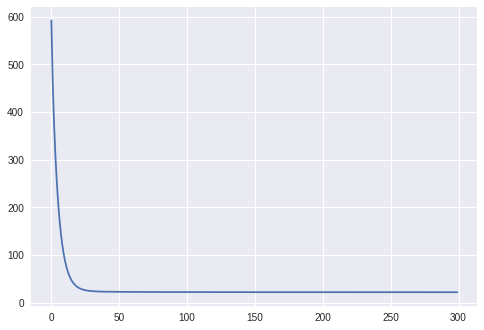

In [101]:
plt.plot(error_list)
plt.show()

In [102]:
#pridictionsdatAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaWZAAAgAElEQVR4nO3df3Bcdf3v8dfZX9mk3TZJs4mmCFag3/bamOoNdy7VIOMWmnLvaIQ6rbn4o7ao09jBmUpbpKPewRFo8XvF2gEsUGuVIV+iX6dzdUyH79h78d4QLw1m2gtXQFChpMlum7JpdjdpNuf+kWSbbX7SbLLnx/MxA9mcPXv2s+/Z6Sufz/mczzFM0zQFAADyypPvBgAAAAIZAABLIJABALAAAhkAAAsgkAEAsAACGQAAC/Dl882j0d6cHq+kpEg9PYmcHtPOqEc26pGNemSjHtmoR7Zc1SMcDk36nKN6yD6fN99NsBTqkY16ZKMe2ahHNuqRbT7q4ahABgDArghkAAAsgEAGAMACCGQAACxgRrOsjx49qieeeEI+n0933323li9frp07dyqdTiscDmvfvn0KBAI6evSoDh8+LI/Ho40bN2rDhg1z3X4AABxh2kDu6enRgQMH9Ktf/UqJREL79+/X73//ezU0NGj9+vXau3evmpubVV9frwMHDqi5uVl+v1/19fVau3atiouL5+NzAABga9MOWbe2turGG2/UwoULVV5ervvvv19tbW2KRCKSpEgkotbWVnV0dKiqqkqhUEjBYFA1NTVqb2+f8w8AAIATTNtDfvvtt2Wapr75zW+qu7tb27dvVzKZVCAQkCSFw2FFo1HFYjGVlpZmXldWVqZoNDp3LQcAwEFmdA65q6tLP/nJT/TOO+/oi1/8ogzDyDxnmmbWz7Hbx+43kZKSopxfbD3VKihuRD2yUY9s1CMb9chGPbLNdT2mDeQlS5boox/9qHw+n66++motWLBAXq9XqVRKwWBQXV1dKi8vV0VFhY4fP555XXd3t1avXj3lsXO9LFs4HMr5cpx2Rj2yUY9s1CMb9chGPbLlqh6zWjrzE5/4hF544QUNDQ3p3LlzSiQSWrNmjVpaWiRJx44dU21traqrq3Xy5EnF43H19fWpvb1dNTU1s278TPUmBnT8xFsauqynDgCAHUzbQ66oqNC6dev0pS99SclkUnv27FFVVZV27dqlpqYmVVZWqr6+Xn6/Xzt27NCWLVtkGIYaGxsVCs3fcMf/7HhHv/ofb+i+L/57XVu5eN7eFwCAXJjROeRNmzZp06ZNWdsOHTo0br+6ujrV1dXlpmXvUXpouGecGkjn5f0BAJgNx6zU5fMOf5R0eijPLQEA4L1zTiB7hmd0p9OcQwYA2I9jAtk70kMeHCKQAQD246BAHu0hM2QNALAf5wTyyJD1IEPWAAAbckwg+zJD1vSQAQD247hAZlIXAMCOHBPIXg/nkAEA9uWYQPaNTupiljUAwIYcE8hez8g5ZHrIAAAbckwgj/aQmWUNALAjxwTy6MIgDFkDAOzIOYGcuQ6ZIWsAgP04JpC57AkAYGcOCuTRWdb0kAEA9uOYQGbpTACAnTkmkDND1vSQAQA25JhApocMALAz5wSyl4VBAAD25ZhAZulMAICdOSaQR5fO5OYSAAA7ck4g00MGANiYYwLZYxjyeAwmdQEAbMkxgSwNX/rEpC4AgB05KpD9XoMhawCALTkqkL30kAEANuWoQPZ5PdxcAgBgSw4LZIOlMwEAtuSwQPYwyxoAYEvOCmSfh0ldAABbclYge5jUBQCwJ2cFso+FQQAA9uSsQPZ6mNQFALAlxwWyaUpDnEcGANiM4wJZEr1kAIDtOCqQR+/4xHlkAIDdOCqQR3vIzLQGANiNowLZnxmypocMALAXRwXypSFresgAAHvxTbfDqVOntG3bNl1zzTWSpOXLl2vr1q3auXOn0um0wuGw9u3bp0AgoKNHj+rw4cPyeDzauHGjNmzYMOcfYCwfPWQAgE1NG8iJRELr1q3Tfffdl9l27733qqGhQevXr9fevXvV3Nys+vp6HThwQM3NzfL7/aqvr9fatWtVXFw8px9grEvnkAlkAIC9TDtk3dfXN25bW1ubIpGIJCkSiai1tVUdHR2qqqpSKBRSMBhUTU2N2tvbc9/iKfh8Iz1khqwBADYzox7yiRMntHXrViWTSW3fvl3JZFKBQECSFA6HFY1GFYvFVFpamnldWVmZotHolMcuKSmSz+ed5Ue4ZLSHHFpUqHA4lLPj2hl1yEY9slGPbNQjG/XINtf1mDaQV6xYocbGRkUiEb355pvavHmzBgcHM8+bppn1c+x2wzCmPHZPT+JK2jwp38ikrtjZCyopnPajOV44HFI02pvvZlgG9chGPbJRj2zUI1uu6jFVqE87ZH3ttddmhqeXLVumsrIyxeNxpVIpSVJXV5fKy8tVUVGhWCyWeV13d7fC4fBs2/6ecA4ZAGBX0wZyc3Ozfv7zn0uSotGozp49q9tvv10tLS2SpGPHjqm2tlbV1dU6efKk4vG4+vr61N7erpqamrlt/WVYOhMAYFfTjuvecsst+ta3vqWWlhYNDAzoe9/7nlauXKldu3apqalJlZWVqq+vl9/v144dO7RlyxYZhqHGxkaFQvN7/sHH0pkAAJuaNpAXL16sgwcPjtt+6NChcdvq6upUV1eXm5ZdgUwPmUAGANiMw1bqYsgaAGBPjgpkbi4BALArRwWy3zd8DpkhawCA3TgqkL2ekR4ya1kDAGzGUYHM0pkAALtyViB7uOwJAGBPzgpkH7OsAQD25KxA5jpkAIBNOTKQB+khAwBsxmGBzDlkAIA9OSqQvQxZAwBsylGB7GfIGgBgU84K5JFZ1oODBDIAwF4cFsheSdJFFgYBANiMowI54B/+OBfpIQMAbMZhgTzSQyaQAQA246xA9tFDBgDYk6MC2ev1yGMYBDIAwHYcFciS5Pd7CGQAgO04L5C9Hg0MpvPdDAAA3hPnBbKPHjIAwH4cF8gBn4frkAEAtuO4QPb7PLp4kUAGANiLAwPZSw8ZAGA7Dgzk4XPIpskdnwAA9uHIQJakQXrJAAAbcVwgs1oXAMCOHBfIoz3kAQIZAGAjjg1kesgAADtxYCBzxycAgP04L5C99JABAPbjuEAO+AlkAID9OC6QL/WQucEEAMA+nBfIzLIGANiQYwOZIWsAgJ0QyAAAWIDjAjkwetkTS2cCAGzEcYFMDxkAYEczCuRUKqVIJKJf//rX6uzs1Be+8AU1NDTo7rvv1sDAgCTp6NGjuuOOO/S5z31Ozc3Nc9roqfgyk7qYZQ0AsI8ZBfKjjz6q4uJiSdKPf/xjNTQ06Omnn9bSpUvV3NysRCKhAwcO6Gc/+5mOHDmiJ554QufPn5/Thk+Gm0sAAOxo2kD+61//qtdff10333yzJKmtrU2RSESSFIlE1Nraqo6ODlVVVSkUCikYDKqmpkbt7e1z2vDJMGQNALCjaQP5oYce0u7duzO/J5NJBQIBSVI4HFY0GlUsFlNpaWlmn7KyMkWj0Tlo7vQCrGUNALAh31RP/uY3v9Hq1av1gQ98ILPNMIzMY9M0s36O3T52v8mUlBTJNxKguVIeXihJ8vq9CodDOT22HVGDbNQjG/XIRj2yUY9sc12PKQP5+PHjeuutt3T8+HGdOXNGgUBAhYWFSqVSCgaD6urqUnl5uSoqKnT8+PHM67q7u7V69epp37ynJzHrDzBWOBxSb29KktTb269otDenx7ebcDjk+hqMRT2yUY9s1CMb9ciWq3pMFepTBvKPfvSjzOP9+/dr6dKleumll9TS0qLPfOYzOnbsmGpra1VdXa09e/YoHo/L6/Wqvb1d3/72t2fd8CsRYJY1AMCGpgzkiWzfvl27du1SU1OTKisrVV9fL7/frx07dmjLli0yDEONjY0KhfIz1MGkLgCAHc04kLdv3555fOjQoXHP19XVqa6uLjetmgXuhwwAsCNW6gIAwAIcF8iGYcjn9bCWNQDAVhwXyNLwxK6BiwQyAMA+HBnIfh89ZACAvTg2kAe57AkAYCOODeQBJnUBAGyEQAYAwAIcGcgBv1cDF9Pj1tgGAMCqHBnIBX6vTFMaTBPIAAB7cGwgS1L/RSZ2AQDswZGBHPCP3GCCQAYA2IQjA5keMgDAbghkAAAswJGBHBgJZJbPBADYhSMDuWDkHDI9ZACAXTgykEd7yP0DBDIAwB4cGcicQwYA2I2jA5nlMwEAduHIQB69DpkhawCAXTgykDM9ZIasAQA24ehA5hwyAMAuCGQAACzAkYF8aS1rJnUBAOzBkYFMDxkAYDeODOQAgQwAsBlHBjKzrAEAduPIQPZ4DPm8HnrIAADbcGQgS8M3mGBSFwDALpwbyAEvPWQAgG04N5D9BDIAwD4cG8gBH4EMALAPxwby6Dlk0zTz3RQAAKbl2EAOBLgFIwDAPhwbyKzWBQCwE8cGcsA30kPmnsgAABtwbCAXBOghAwDsw7mBPHrHJ84hAwBswMGBPNJDZsgaAGADjg1k7vgEALAT33Q7JJNJ7d69W2fPnlV/f7+2bdumFStWaOfOnUqn0wqHw9q3b58CgYCOHj2qw4cPy+PxaOPGjdqwYcN8fIYJMcsaAGAn0wbyH/7wB61atUp33XWXTp8+ra985Sv62Mc+poaGBq1fv1579+5Vc3Oz6uvrdeDAATU3N8vv96u+vl5r165VcXHxfHyOcQoLhgM52T+Yl/cHAOC9mHbI+rbbbtNdd90lSers7FRFRYXa2toUiUQkSZFIRK2trero6FBVVZVCoZCCwaBqamrU3t4+t62fQjAw/LdGinPIAAAbmLaHPGrTpk06c+aMHnvsMW3evFmBQECSFA6HFY1GFYvFVFpamtm/rKxM0Wg09y2eocKRy54IZACAHcw4kJ955hm98soruueee2QYRmb76FrRl68ZbZpm1n4TKSkpkm9kAY9cCYdDkqSe5PBQteH1ZLa5kZs/+0SoRzbqkY16ZKMe2ea6HtMG8qlTp7RkyRK9//3v18qVK5VOp1VYWKhUKqVgMKiuri6Vl5eroqJCx48fz7yuu7tbq1evnvLYPT2JWX+AscLhkKLRXklSKtEvSTp3PpnZ5jZj6wHqcTnqkY16ZKMe2XJVj6lCfdpzyC+++KKeeuopSVIsFlMikdCaNWvU0tIiSTp27Jhqa2tVXV2tkydPKh6Pq6+vT+3t7aqpqZl146/UpXPITOoCAFjftD3kTZs26b777lNDQ4NSqZS+853vaNWqVdq1a5eamppUWVmp+vp6+f1+7dixQ1u2bJFhGGpsbFQolL/hjtFZ1pxDBgDYwbSBHAwG9cMf/nDc9kOHDo3bVldXp7q6uty0bJYK/F4ZklJc9gQAsAHHrtRlGIYKAl4l6SEDAGzAsYEsSYUFPs4hAwBswdGBHAx4leynhwwAsD6HB7KPSV0AAFtweCB7NZge0mCaeyIDAKzN0YFcWMB61gAAe3B0IAdH17Pm0icAgMU5OpALR1br4tInAIDVOTqQg5nVuughAwCszdmBPDJkzaVPAACrc3ggc4MJAIA9ODyQucEEAMAeHB3ImcuemGUNALA4RwcyPWQAgF04OpBHe8hJziEDACzO0YFMDxkAYBcOD+SRHjLnkAEAFufoQC4aHbLmOmQAgMU5OpADfo+8HkOJ1MV8NwUAgCk5OpANw1BR0KcEQ9YAAItzdCBLUlHQr74UgQwAsDbnB3KBT4nURZmmme+mAAAwKccH8oKgT4NpUxcHh/LdFAAAJuX4QC4KDs+0ZtgaAGBlLghkvyQxsQsAYGmOD+QFIz1kLn0CAFiZ4wOZIWsAgB04P5BHV+sikAEAFub4QF4wcg65jyFrAICFOT6QC0fPITOpCwBgYY4P5EuTughkAIB1OT6QixiyBgDYgPMDuYAeMgDA+ghkAAAswPGB7PEYKizwcR0yAMDSHB/I0nAvOdnPOWQAgHW5IpAXBOkhAwCszRWBXBT0KTWQVnqIWzACAKzJFYG8sHDk0qckvWQAgDX5ZrLT3r17deLECQ0ODuprX/uaqqqqtHPnTqXTaYXDYe3bt0+BQEBHjx7V4cOH5fF4tHHjRm3YsGGu2z8jC4sCkqTexIAWLQjkuTUAAIw3bSC/8MILeu2119TU1KSenh599rOf1Y033qiGhgatX79ee/fuVXNzs+rr63XgwAE1NzfL7/ervr5ea9euVXFx8Xx8jimFRnrIF5JM7AIAWNO0Q9Y33HCDHnnkEUnS4sWLlUwm1dbWpkgkIkmKRCJqbW1VR0eHqqqqFAqFFAwGVVNTo/b29rlt/QyFioYDuTdBIAMArGnaHrLX61VRUZEk6dlnn9VNN92kP/7xjwoEhod+w+GwotGoYrGYSktLM68rKytTNBqd8tglJUXy+byzaf844XBo3LbKikWSJNPrmfB5J3Pb550O9chGPbJRj2zUI9tc12NG55Al6bnnnlNzc7OeeuoprVu3LrPdNM2sn2O3G4Yx5TF7ehLvpa3TCodDikZ7x20302lJUmd374TPO9Vk9XAr6pGNemSjHtmoR7Zc1WOqUJ/RLOvnn39ejz32mA4ePKhQKKTCwkKlUilJUldXl8rLy1VRUaFYLJZ5TXd3t8Lh8Cybnhuj55AZsgYAWNW0gdzb26u9e/fq8ccfz0zQWrNmjVpaWiRJx44dU21traqrq3Xy5EnF43H19fWpvb1dNTU1c9v6GQqNmWUNAIAVTTtk/bvf/U49PT365je/mdn24IMPas+ePWpqalJlZaXq6+vl9/u1Y8cObdmyRYZhqLGxUaGQNc4/LGSWNQDA4qYN5I0bN2rjxo3jth86dGjctrq6OtXV1eWmZTnk93kUDHgZsgYAWJYrVuqShnvJ9JABAFblmkAOFQXUmxgYNxscAAArcFEg+zWYNpUaSOe7KQAAjOOeQB699IlhawCABbkmkBdmls/k0icAgPW4JpAvXYtMDxkAYD2uCeSFhfSQAQDW5ZpALl443EOO9xHIAADrcU0gL15QIEk630sgAwCsxzWBXBwaCeS+/jy3BACA8VwTyKEivzyGofMXCGQAgPW4JpA9hqFFC/x69wJD1gAA63FNIEtS8cICnb/A8pkAAOtxXSAPpofUlxrMd1MAAMjiskAevvTpXc4jAwAsxlWBvHjhyExrziMDACzGVYE82kNmpjUAwGpcFciXesgEMgDAWlwVyCUjgcylTwAAq3FVIC9myBoAYFGuCuRFRQF5DEM9BDIAwGJcFcgej6GSUIHOvpvKd1MAAMjiqkCWpLLFQZ2/MKCLg0P5bgoAABmuC+Qli4OSpHO99JIBANbhukAuGwlkhq0BAFbiukBesmg4kGMEMgDAQlwXyPSQAQBW5LpAHj2HfDZOIAMArMN1gVy6KChDDFkDAKzFdYHs83pUzLXIAACLcV0gS8MTu3p6+5Ue4lpkAIA1uDKQy4qDGjJNnY2zhCYAwBpcGcjvKymSJHWdS+S5JQAADHNnIC8ZDuQzZwlkAIA1uDOQS0cCmR4yAMAiXBnIFSUEMgDAWlwZyAUBr0pCBQQyAMAyXBnI0vCwdU9vv1IDg/luCgAAMwvkV199VWvXrtUvfvELSVJnZ6e+8IUvqKGhQXfffbcGBgYkSUePHtUdd9yhz33uc2pubp67VufA6MSurnPJPLcEAIAZBHIikdD999+vG2+8MbPtxz/+sRoaGvT0009r6dKlam5uViKR0IEDB/Szn/1MR44c0RNPPKHz58/PaeNnY3RiV+e5vjy3BACAGQRyIBDQwYMHVV5entnW1tamSCQiSYpEImptbVVHR4eqqqoUCoUUDAZVU1Oj9vb2uWv5LFUuWSBJeifGeWQAQP75pt3B55PPl71bMplUIBCQJIXDYUWjUcViMZWWlmb2KSsrUzQazXFzc+eq8oWSpLe7L+S5JQAAzCCQJ2IYRuaxaZpZP8duH7vfREpKiuTzea+kCZMKh0Mz3E8qXVSgt2N9M36NHTn5s10J6pGNemSjHtmoR7a5rscVBXJhYaFSqZSCwaC6urpUXl6uiooKHT9+PLNPd3e3Vq9ePeVxenpyO1wcDocUjfbOeP+lZQt18o2zevMf57Sw0J/TtljBe62H01GPbNQjG/XIRj2y5aoeU4X6FV32tGbNGrW0tEiSjh07ptraWlVXV+vkyZOKx+Pq6+tTe3u7ampqrqzF8+TqiuFh67e6+NIBAPJr2h7yqVOn9NBDD+n06dPy+XxqaWnRww8/rN27d6upqUmVlZWqr6+X3+/Xjh07tGXLFhmGocbGRoVC1h7u+MDIeeR/dF/Qyg+WTrM3AABzZ9pAXrVqlY4cOTJu+6FDh8Ztq6urU11dXW5aNg+urhj+g+EfXUzsAgDkl2tX6pKk8pJCFfi9+tuZeL6bAgBwOVcHsscw9KHKReo8m9CF5MV8NwcA4GKuDmRJum7pYknSX0+/m+eWAADczPWBfP1Vw4H8OoEMAMgj1wfytUsXyzCk196y7rrbAADnc30gFxb4dFV4od4806vB9FC+mwMAcCnXB7IkLb+qWBcHh/TGO8y2BgDkB4Es6cPLhhcFOfnG2Ty3BADgVgSypJXXlMjnNXTyrwQyACA/CGRJBQGv/ukDxfpH9wWdv9Cf7+YAAFyIQB5R9aElkkQvGQCQFwTyiOrryiRJJ16N5rklAAA3IpBHVJQW6Zr3hXTqjXOKJwby3RwAgMsQyGP8x39XoSHT1Iv/rzvfTQEAuAyBPMZ/WFkhQ1Lr/z2T76YAAFyGQB6jJFSgDy8r1V9Px/X3M735bg4AwEUI5MusrblKkvTci2/luSUAADchkC+z6kNLVFFapLZXuvQu1yQDAOYJgXwZj2Ho1hs+oMG0qf/+v/+e7+YAAFyCQJ5A7Ufer/LiQh3/82l19yTy3RwAgAsQyBPweT26/ZMfUnrI1DP/9rpM08x3kwAADkcgT6JmRblWXF2sP78eU9vLXfluDgDA4QjkSXgMQ1++baUCfo9+cexVdTF0DQCYQwTyFMqLC/VfblmuRP+g9v/qpBKpwXw3CQDgUATyNGo/Uqm1NVfpnVif/vlf/kwoAwDmBIE8A5s+db1u/PD79MY7cT34yxOKnk/mu0kAAIchkGfA4zG05T+t1Kc+tlRvR/v0Xw/9H/2vk53MvgYA5AyBPEMej6E7b/0nbV6/QmnT1JO/fUU/OHJCJ984qyGCGQAwS758N8BuaqsrtfKDJWr6t9d14tWo/tu/dKhscVC1H3m/Pro8rKVlC2QYRr6bCQCwGQL5CpQtLlTj7VX625m4jr90Wm0vd+tfn39T//r8m1q0IKAVVxfr6oqQrgov0PtKi1QSCsrvYzACADA5AnkWPvi+Rfry+kXa+Knr1f5qVC//7Zxe/luP/vRKt/70SnfWvqEiv0pDQS1aEFBR0KfCAp8KC7wqKhh+7Pd65PN5hn96PfL5jEuPvR55PIY8hkZ+GjKM4WulPR5DRubnyDbDkMcjpQYGdXFwSB6PZBiGDIneOwBYlGHmcWZSNJrbew6Hw6GcH/O9Mk1T0fNJvR3t09vdF9R9Pqlz8ZR6evt1rrdfFweH8tq+UcbI/wwNB7mkkZ/Dv2fCO/N45LnM40vhPrq/jEvPj3vusvcxdOnYY1839riZdmY9yHqY9Zsx2T4jv/h8XqXH1n+S/Y2JXjyD4w8/nHinrONnvXaCzzquDWO3T/zE5G2b+PgypEDAp4GBK7uMz9AkDZzJa/P8N+Fkbx8o8Gmgf+p65PsP2vl8+4ICn/rH1GO2n31Wr57l557Ny68KL9SnP7EsZ/kSDocmfY4eco4ZhqHykiKVlxTpY8vDWc+ZpqnUQFrJ/sGR/9JK9A9merIX00MaHBzSYNoc83h4uzkkDZnm8H9Dpkxzkt/HPPb5vepPXdSQOfzepimZww2RqdHHkjn8v+FtIxvNzO8TPJd5nTIzzccde+T9NOZ1w+0Y3TaUdZxLrxtf08n+Zhy7OXsPc8J9DEMaMse/wNTEBxp7zOwmTHz8yds2/fEBWNMbnXH95zUfnJf3IpDnkWEYI0PV81N2K4wYWIld6jH2D5BJ/g7ICvmZ/FEw0R8RZeGQYldQj1n9ITHLv0LMWR5gqvHAsrKFisUuzOr4V/reMzzCvL6ybMlCxc4O1yOfF5LMdhB3tk0vDPjk8czP0ASBDFjMhEP2U/9yRQr8XgX83lkfxymKgv55+2PZDhYWBZTs8+e7Ga7C1F8AACyAQAYAwAIIZAAALIBABgDAAnI+g+EHP/iBOjo6ZBiGvv3tb+sjH/lIrt8CAADHyWkg/+lPf9Lf//53NTU16fXXX9e9996rZ599NpdvAQCAI+V0yLq1tVVr166VJF133XWKx+O6cGHurusDAMApchrIsVhMJSUlmd+XLFmiaDSay7cAAMCRcjpkffmKKqZpTrn+aUlJkXy+3C5MMNU6oW5EPbJRj2zUIxv1yEY9ss11PXIayBUVFYrFYpnfu7u7VVZWNun+PT2JXL69bZZGnC/UIxv1yEY9slGPbNQj23zcXCKnQ9Yf//jH1dLSIkl6+eWXVV5eroULF+byLQAAcKSc337x4Ycf1osvvijDMPTd735XK1asyOXhAQBwpLzeDxkAAAxjpS4AACyAQAYAwAIIZAAALIBABgDAAghkAAAsIOd3e8oXt99l6tSpU9q2bZuuueYaSdLy5cu1detW7dy5U+l0WuFwWPv27VMgEMhzS+fWq6++qm3btunLX/6y7rzzTnV2dk5Yg6NHj+rw4cPyeDzauHGjNmzYkO+mz4nL63H//ffrpZde0oIFCyRJW7Zs0c033+yaeuzdu1cnTpzQ4OCgvva1r6mqqsrV34/L69HW1ubK70cymdTu3bt19uxZ9ff3a9u2bVqxYsX8fzdMB2hrazO/+tWvmqZpmq+99pq5YcOGPLdo/rW1tZnf//73s7bt3r3b/N3vfmeapmk+9NBD5i9/+ct8NG3e9PX1mXfeeae5Z88e88iRI6ZpTlyDvr4+89ZbbzXj8biZTCbNdevWmT09Pfls+pyYrB4vv/zyuP3cUI/W1lZz69atpmma5rlz58xPfvKTrv5+TFYPN34/fvvb35o//XVgWdIAAAOKSURBVOlPTdM0zbffftu89dZb8/LdcMSQNXeZkvr6+sZta2trUyQSkSRFIhG1trbOd7PmVSAQ0MGDB1VeXp7ZNlENOjo6VFVVpVAopGAwqJqaGrW3t+er2XNmonpM9D1xSz1uuOEGPfLII5KkxYsXK5lMuvr7MVE94vH4uP3cUI/bbrtNd911lySps7NTFRUVefluOGLIOhaL6cMf/nDm99G7TLlp2c5EIqETJ05o69atSiaT2r59u5LJZGaIOhwOO/7OWz6fTz5f9ld6ohrEYjGVlpZm9ikrK3NkbSaqR19fn37yk58oHo+roqJCe/bscU09vF6vioqKJEnPPvusbrrpJv3xj3907fdjonqcO3fOtd8PSdq0aZPOnDmjxx57TJs3b57374YjAtl8j3eZcqIVK1aosbFRkUhEb775pjZv3qzBwcHM85fXyC3Gfg9Ga+Dm78umTZt03XXXadmyZXr00Ue1f/9+VVdXZ+3j9Ho899xzam5u1lNPPaV169Zltrv1+zG2Hi+88IKrvx/PPPOMXnnlFd1zzz15+bfDEUPW7/UuU0507bXXZoZXli1bprKyMsXjcaVSKUlSV1dX1tClWxQWFo6rwUTfl3A4nK8mzqtbbrlFy5Ytyzz+y1/+4qp6PP/883rsscd08OBBhUIh138/Lq+HW78fp06dUmdnpyRp5cqVSqfTefluOCKQucuU1NzcrJ///OeSpGg0qrNnz+r222/P1OXYsWOqra3NZxPzYs2aNeNqUF1drZMnTyoej6uvr0/t7e2qqanJc0vnx9e//nW98847kobPr19//fWuqUdvb6/27t2rxx9/XMXFxZLc/f2YqB5u/X68+OKLeuqppyQNnwJNJBJ5+W445uYSbr/L1LvvvqtvfetbSiQSGhgY0De+8Q2tXLlSu3btUn9/vyorK/XAAw/I7/fnu6lz5tSpU3rooYd0+vRp+Xw+VVRU6OGHH9bu3bvH1eD3v/+9nnzySRmGoTvvvFOf/vSn8938nJuoHp///Of15JNPqqioSIWFhXrggQe0ZMkSV9SjqalJ+/fvz/QAJenBBx/Unj17XPn9mKged9xxh44cOeK670cqldJ9992nzs5OpVIpfeMb39CqVasm/PdzLmvhmEAGAMDOHDFkDQCA3RHIAABYAIEMAIAFEMgAAFgAgQwAgAUQyAAAWACBDACABRDIAABYwP8H2JncBZRSOLwAAAAASUVORK5CYII=
y_ = hypothesis(X,theta)
r2_score(y,y_)

74.04541323942742